# Question 2: What is the regional enrollement (y) from each racial subgroup (Black, White, Asian, Hispanic, American Indian, English Second Langauge (ESL) (x) during 2009-2016?
### Stacked Bar graph of regional (S, MW, NE, W) spend for 50 states & DC 
o  Phase 1: Normalize as a ratio starting from the first year (2009) 
o  Phase 2: Aggregate enrollment and display as a percentage   

**Goal:** a) Figure out which racial subgroups are outliers in terms of enrollment over the years b) Figure out which states improved in funding over the years

In [148]:
'''
Load the finance data and import all necessary libraries  
'''
import random
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import reduce

valid_regions = ["Northeast", "South", "West", "Midwest"]
valid_years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]
valid_cols = ["race", "state_name", "region","year","enrollement"]

''''
NEED TO UPDATE: Pulled Sample Race Enrollement Excel file  
'''''

race_df = pd.read_excel(open('Sample_race_enrollement_data.xlsx','rb'), sheet_name='Sheet1')
race_df.head()

,year,leaid,fips,grade,race,sex,enrollment
0,2013,100002,1,3,1,1,-1
1,2013,100002,1,3,1,2,-1
2,2013,100002,1,3,1,99,0
3,2013,100002,1,3,2,1,-1
4,2013,100002,1,3,2,2,-1


In [149]:
'''
Map geographic data (region, state) to finance data 
'''

value_mappings = pd.read_excel(open('finance_data/codebook_districts_ccd_finance.xls', 'rb'), sheet_name='values')

fips_states = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
race_df["state_name"] = race_df["fips"].map(fips_states)

fips_regions = value_mappings[value_mappings["format"] == "fips"].set_index('code').region.to_dict()
race_df["region"] = race_df["fips"].map(fips_regions)


'''
Map Racial data to race codebook 
'''

#need to open both excel files because this workbook doesn't have the regions already mapped 
value_mappings2 = pd.read_excel(open('codebook_districts_ccd_enrollment.xls', 'rb'), sheet_name='values') 

grade_codes = value_mappings2[value_mappings2["format"] == "grade"].set_index('code').code_label.to_dict()
race_df['grade'] = race_df['grade'].map(grade_codes)

race_codes = value_mappings2[value_mappings2["format"] == "race"].set_index('code').code_label.to_dict()
race_df['race'] = race_df['race'].map(race_codes)

sex_codes = value_mappings2[value_mappings2["format"] == "sex"].set_index('code').code_label.to_dict()
race_df['sex'] = race_df['sex'].map(sex_codes)

race_df.head(30)

,year,leaid,fips,grade,race,sex,enrollment,state_name,region
0,2013,100002,1,3,White,Male,-1,Alabama,South
1,2013,100002,1,3,White,Female,-1,Alabama,South
2,2013,100002,1,3,White,Total,0,Alabama,South
3,2013,100002,1,3,Black,Male,-1,Alabama,South
4,2013,100002,1,3,Black,Female,-1,Alabama,South
5,2013,100002,1,3,Black,Total,0,Alabama,South
6,2013,100002,1,3,Hispanic,Male,-1,Alabama,South
7,2013,100002,1,3,Hispanic,Female,-1,Alabama,South
8,2013,100002,1,3,Hispanic,Total,0,Alabama,South
9,2013,100002,1,3,Asian,Male,-1,Alabama,South


In [150]:
'''
Filter the Data for entries with no data
'''

#Drop all who data whose enrollment is -1,-2,-3 meaning its Suppressed data, Not applicable, or Missing/not reported
#Drop all data that contains total (99)

race_filtered = race_df.loc[(race_df['enrollment'] > 0) & (race_df['race'] != 'Total') & (race_df['sex'] != 'Total')]


race_filtered.head(20)


,year,leaid,fips,grade,race,sex,enrollment,state_name,region
124,2010,100005,1,2,White,Male,96,Alabama,South
125,2010,100005,1,2,White,Female,104,Alabama,South
127,2010,100005,1,2,Black,Male,6,Alabama,South
128,2010,100005,1,2,Black,Female,4,Alabama,South
130,2010,100005,1,2,Hispanic,Male,95,Alabama,South
131,2010,100005,1,2,Hispanic,Female,61,Alabama,South
134,2010,100005,1,2,Asian,Female,2,Alabama,South
148,2010,100005,1,3,White,Male,90,Alabama,South
149,2010,100005,1,3,White,Female,96,Alabama,South
151,2010,100005,1,3,Black,Male,3,Alabama,South


In [151]:
'''
Clean Up Unused Cols and group by region, race, year and sum enrollment 
'''

print(race_filtered.columns)
dropcolumns_df = race_filtered.drop(['leaid', 'fips', 'state_name', 'grade','sex'],axis =1)
dropcolumns_df

Index(['year', 'leaid', 'fips', 'grade', 'race', 'sex', 'enrollment',
       'state_name', 'region'],
      dtype='object')


,year,race,enrollment,region
124,2010,White,96,South
125,2010,White,104,South
127,2010,Black,6,South
128,2010,Black,4,South
130,2010,Hispanic,95,South
...,...,...,...,...
410,2012,White,96,South
411,2012,White,107,South
413,2012,Black,2,South
414,2012,Black,2,South


In [153]:
'''
Grouping together the data 
'''
grouped_df = dropcolumns_df.groupby(['year','region','race']).sum().reset_index()

transposed_df = grouped_df.pivot_table('enrollment', ['region', 'year'], 'race')
transposed_df

new = transposed_df.reset_index( drop=False)
new.reindex(['region', 'year', 'American Indian or Alaska Native', 'Asian', 'Black', 'Hispanic', 'Native Hawaiian or other Pacific Islande','Two or more races','White'], axis=1)
new.fillna(0)

race,region,year,American Indian or Alaska Native,Asian,Black,Hispanic,Native Hawaiian or other Pacific Islander,Two or more races,White
0,South,2009,17.0,18.0,276.0,810.0,0.0,0.0,5586.0
1,South,2010,0.0,4.0,17.0,283.0,0.0,0.0,386.0
2,South,2011,4.0,2.0,11.0,211.0,0.0,2.0,1114.0
3,South,2012,1.0,5.0,18.0,399.0,0.0,18.0,755.0
4,South,2016,4.0,4.0,45.0,692.0,1.0,31.0,589.0


<AxesSubplot:xlabel='year'>

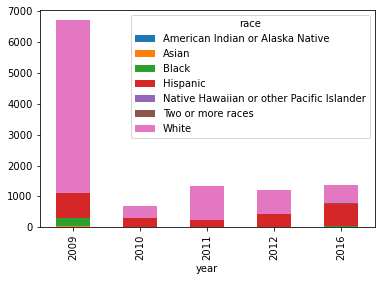

In [159]:
'''
Create Stacked bar chart using pandas barchart
'''
resetindex = new.set_index('year')
resetindex.plot.bar(stacked = True)